# Kütüphaneler

In [65]:
import pandas as pd  # Veri setinin düzenlenmesi
import numpy as np   # Matematiksel işlemler
import tensorflow as tf    # Sinir ağının kurulması ve eğitilmesi
import keras

import matplotlib.pyplot as plt    # Grafik çizimi
import seaborn as sns

from keras.datasets import cifar10   # Veri setini elde etmek için
from keras.utils import to_categorical    # Çıktıların kategorize edilmesi
from keras.models import Sequential
from keras import layers
from keras import optimizers

import warnings
warnings.filterwarnings("ignore")

## Veri Ön İşleme

In [66]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [67]:
number_of_classes = 10
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [68]:
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_test : {}".format(y_test.shape))

X_train : (50000, 32, 32, 3)
y_train : (50000, 10)
X_test : (10000, 32, 32, 3)
y_test : (10000, 10)


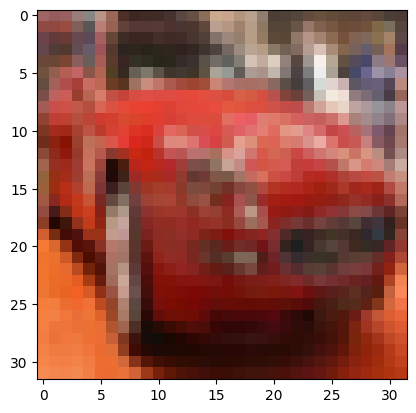

In [69]:
plt.imshow(X_train[5])

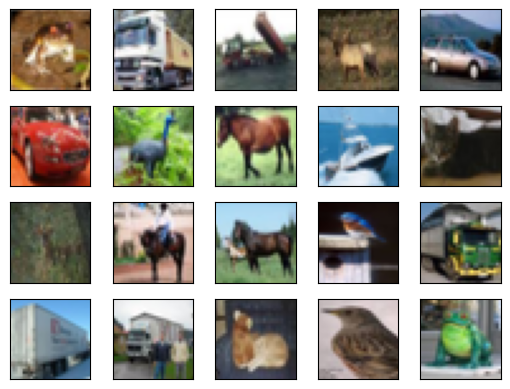

In [70]:
figs, axes = plt.subplots(4,5)

for i in range(4):
    for j in range(5):
        axes[i, j].imshow(X_train[i*5+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].grid(False)

### Normalizasyon

In [71]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

### Model Oluşturma

In [72]:
def cnn_model():
    model = Sequential()

    model.add(layers.Conv2D(filters=32,
                            kernel_size=(3,3),
                            activation='relu',
                            padding='same',
                            input_shape= (32, 32, 3)))

    model.add(layers.Conv2D(filters=32,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters=64,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters=64,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(512,activation='relu'))

    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10,activation='softmax'))

    model.summary()

    return model

In [73]:
model = cnn_model()

# RMSprop Optimizer
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate=0.0001), metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [74]:
#Belirlenen parametreler ve eğitim veri seti ile kurulan modelin eğitilmesi

hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 239s 152ms/step - loss: 1.9124 - acc: 0.2940 - val_loss: 1.6306 - val_acc: 0.4162
Epoch 2/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.5976 - acc: 0.4119 - val_loss: 1.4971 - val_acc: 0.4651
Epoch 3/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.4868 - acc: 0.4570 - val_loss: 1.3878 - val_acc: 0.5001
Epoch 4/10
1563/1563 [==============================] - 225s 144ms/step - loss: 1.4043 - acc: 0.4933 - val_loss: 1.3266 - val_acc: 0.5193
Epoch 5/10
1563/1563 [==============================] - 229s 147ms/step - loss: 1.3363 - acc: 0.5183 - val_loss: 1.2921 - val_acc: 0.5448
Epoch 6/10
1563/1563 [==============================] - 229s 147ms/step - loss: 1.2695 - acc: 0.5452 - val_loss: 1.1696 - val_acc: 0.5949
Epoch 7/10
1563/1563 [==============================] - 237s 152ms/step - loss: 1.2081 - acc: 0.5672 - val_loss: 1.0967 - val_acc: 0.6167
Epoch 8/10
1563/1563 [============

In [75]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 10s 32ms/step - loss: 0.9608 - acc: 0.6609
Test loss: 0.9607683420181274
Test accuracy: 0.6608999967575073


In [76]:
def result_graph():
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1,len(acc)+1)

  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.show()

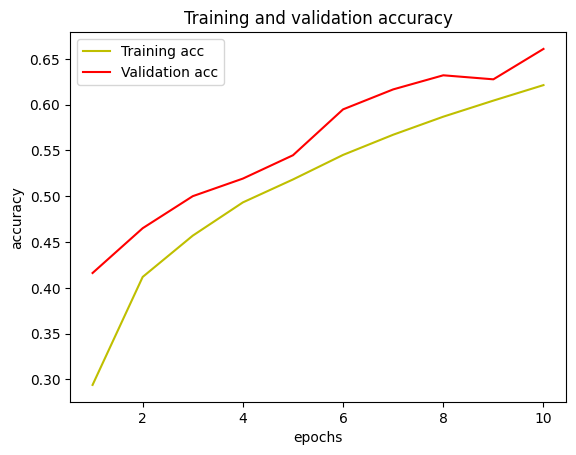

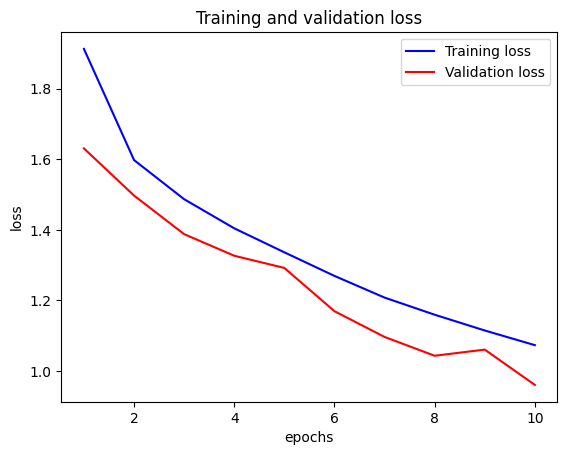

In [77]:
result_graph()

In [78]:
# Adam Optimizer
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [79]:
hist = model.fit(X_train, y_train, batch_size = 32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 228s 145ms/step - loss: 1.0371 - acc: 0.6334 - val_loss: 0.9485 - val_acc: 0.6684
Epoch 2/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9961 - acc: 0.6489 - val_loss: 0.8994 - val_acc: 0.6866
Epoch 3/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.9664 - acc: 0.6582 - val_loss: 0.8776 - val_acc: 0.6905
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.9403 - acc: 0.6682 - val_loss: 0.8656 - val_acc: 0.6959
Epoch 5/10
1563/1563 [==============================] - 229s 147ms/step - loss: 0.9104 - acc: 0.6793 - val_loss: 0.8281 - val_acc: 0.7128
Epoch 6/10
1563/1563 [==============================] - 233s 149ms/step - loss: 0.8840 - acc: 0.6868 - val_loss: 0.8135 - val_acc: 0.7152
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.8664 - acc: 0.6946 - val_loss: 0.7842 - val_acc: 0.7265
Epoch 8/10
1563/1563 [============

In [80]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 38ms/step - loss: 0.7284 - acc: 0.7448
Test loss: 0.728355884552002
Test accuracy: 0.7447999715805054


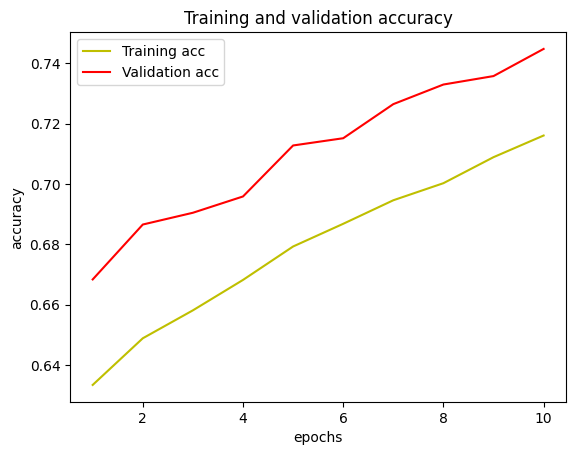

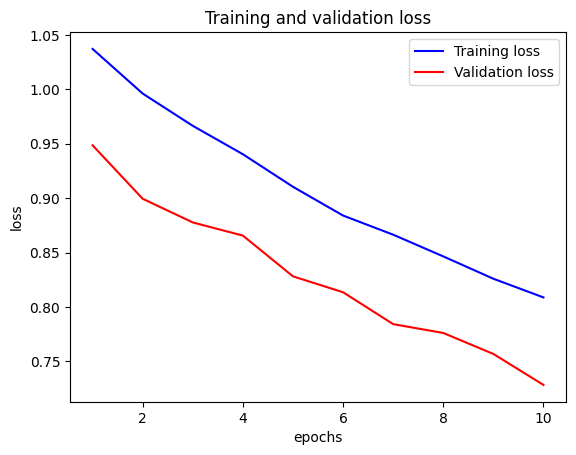

In [81]:
result_graph()